<a href="https://colab.research.google.com/github/pattichis/AI4All-Med/blob/main/Session_3_6_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Models

Goals:

1. Introduce the PyTorch environment for building, training, and testing AI models.
2. The introduction of several AI and Machine Learning models and concepts associated with training and testing.
3. Use of parametrizable Convolutional Neural Networks as a basic model.
4. Comparisons of different Neural Network models.


The goal of the tutorial is to provide an introduction to the process of building, training, and testing AI models following the official tutorial by PyTorch.

It is important to be able to reuse tutorial material from the official website. However, the current tutorial includes additional information that goes well beyond the official documentation.

Additional material includes:
* A fully parametrized CNN network to explore different models along with the official model.
* Dataset visualization.
* Additional documentation for each aspect of the original tutorial to make it more accessible.

References:
* A collection of tutorials are available at [main website](https://docs.pytorch.org/tutorials/).
* The current document follows the [Quickstart tutorial](https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html).

# Setup

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [ ]:
import math
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F

# Datasets

<b>PyTorch Documentation</b><br>

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


<b>Check your understanding:</b><br>
1. How is the <tt>train</tt> parameter used to specify training and testing datasets?
2. What is the final type for the dataset?

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 307kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.64MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.8MB/s]


<b>PyTorch Documentation:</b><br>
We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


<b>Check your understanding</b>
The batch size is used for computing losses. A batch size of 64 means that we are averaging the loss over 64 images.

Based on the code below:
1. How would the number of channels change for color images?
2. How do we control the size of each image?

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print("N = batch size. This is the number of images to process at a time.")
    print("C = number of channels. C=1 for grayscale. C=3 for RGB.")
    print("H = height is the number of rows in the image.")
    print("W = width is the number of columns in the image.")
    print(" ")
    print(f"Shape of y: {y.shape} {y.dtype}")
    print("y is of size N, the ground truth labels required for each image in the batch.")
    break

train_size = len(train_dataloader.dataset)
test_size  = len(test_dataloader.dataset)
train_pct  = 100*train_size/(train_size+test_size)
test_pct   = 100*test_size/(train_size+test_size)
print(f"Percentage of training dataset = {train_pct:.2f} percent with {train_size} samples.")
print(f"Percentage of test dataset     = {test_pct:.2f} percent with {test_size} samples.")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
N = batch size. This is the number of images to process at a time.
C = number of channels. C=1 for grayscale. C=3 for RGB.
H = height is the number of rows in the image.
W = width is the number of columns in the image.
 
Shape of y: torch.Size([64]) torch.int64
y is of size N, the ground truth labels required for each image in the batch.
Percentage of training dataset = 85.71 percent with 60000 samples.
Percentage of test dataset     = 14.29 percent with 10000 samples.


## Datasets visualization

Review the dataset and answer the following:
1. How many categories are we looking at?
2. Comment on the quality of the images.

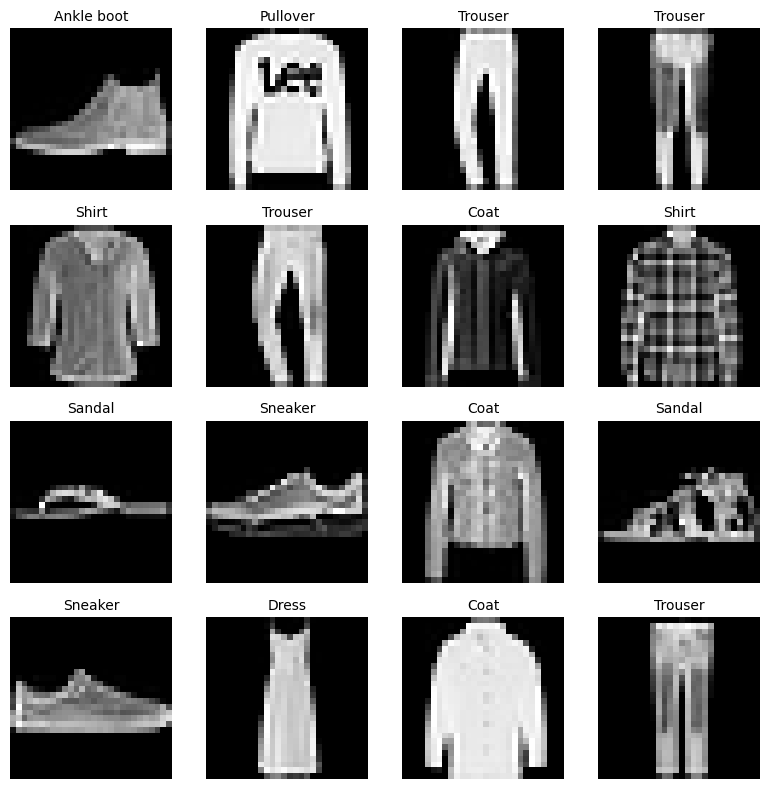

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

import torch
import matplotlib.pyplot as plt
import math

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

def show_images(batch_tensor, n=16, titles=None):
    """
    Display n grayscale images from a batch [B, 1, H, W] in a rectangular grid with optional titles.

    Parameters:
    - batch_tensor: torch.Tensor of shape [B, 1, H, W]
    - n: number of images to show
    - titles: list of titles or labels for each image (length n)
    """
    assert batch_tensor.ndim == 4 and batch_tensor.size(1) == 1, "Expected shape [B, 1, H, W]"
    n = min(n, batch_tensor.size(0))
    if titles is None:
        titles = [f"Image {i}" for i in range(n)]
    else:
        assert len(titles) >= n, "Not enough titles for the number of images."

    # Determine grid size
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))

    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(n):
        img = batch_tensor[i, 0].cpu().numpy()
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(classes[y[i]], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(batch_tensor=X, n=16, titles=y)

------------------------------------------------------------------------


Creating Models
===============

<b>PyTorch documentation:</b>

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the
[accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If the current accelerator is
available, we will use it. Otherwise, we use the CPU.


<b>Additional information:</b><br>
<b>CNN model</b></br>
Carefully study the SimpleCNN model line-by-line and answer:
1. Verify the sizes stated in the comments.
2. Do the layer connections depend on the batch size? Why or why not? Explain.
3. In order for conv2 to connect to conv1, we need to setup the number of input filters correctly. How was this accomplished?
4. After flattening, we need to know the final count of pixels input to the linear layer. Verify the formula.<br>

<b>Assignment:</b><br>
1. Modify the number of filters and rerun the code to get different results.


<b>Linear Model</b><br>
1. Study the linear model and verify the sizes used for the diffent layers.

Study the class structure and answer:
1. How are the inputs used to initialize the layers for SimpleCNN?
2. Which methods have to be defined in the Neural Network class?

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class SimpleCNN(nn.Module):
    def __init__(self, num_of_rows = 28, num_of_cols = 28,
                 n_filters1=4, n_filters2=8, out_categories=10):
        super().__init__()

        self.conv1 = nn.Conv2d(
                in_channels=1,            # 1 for grayscale
                out_channels=n_filters1,   # Number of filters
                kernel_size=3,            # 3x3 convolution
                stride=1,
                padding=1          # Keep output size same as input
                )
        self.pool = nn.MaxPool2d(2, 2)  # halves size to 14x14

        self.conv2 = nn.Conv2d(
                in_channels=n_filters1,    # NOTE: Use n_filters1 from conv1
                out_channels=n_filters2,   # New number of filters
                kernel_size=3,            # 3x3 convolution
                stride=1,
                padding=1          # Keep output size same as input
                )

        # out_categories should match the number of output categories.
        # Match the dimensions to the input.
        # Divide by 2 for each maxpooling (carefull for non-even numbers ...)
        num_of_pixels = math.ceil(num_of_rows/(2*2) * num_of_cols/(2*2))

        # Final layer collects the pixels from all of the inputs:
        self.fc1 = nn.Linear(n_filters2 * num_of_pixels, out_categories)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> [batch, 4, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # -> [batch, 8, 7, 7]
        x = x.view(x.size(0), -1)             # flatten to [batch, 8*7*7]
        logits = F.relu(self.fc1(x))
        return logits # Note: SoftMax is applied to logits by cross-entropy loss function.

# Define model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# Define the model here

## Linear Model
#NeuralNetwork = LinearModel
#model_to_use  = LinearModel()

## SimpleCNN
NeuralNetwork = SimpleCNN
model_to_use = SimpleCNN(n_filters1=4, n_filters2=8)

model = model_to_use.to(device)

Using cpu device


# Understanding the AI model architecture

1. For each layer, confirm the number of parameters.
2. For connecting between layers, take a look at the parameters and see if there are any requirements.
3. Note the number of parameters for comparing among models.
4. Can you think of the advantages and disadvantages of using low-parameter models?
5. Can you think of the advantages of using high-parameter models?

In [ ]:
def parameter_report(model):
    print(f"{'Layer':<40} {'# Params':>12} {'Trainable':>10}")
    print("-" * 65)
    total, trainable = 0, 0
    for name, param in model.named_parameters():
        num_params = param.numel()
        is_trainable = param.requires_grad
        print(f"{name:<40} {num_params:>12,} {str(is_trainable):>10}")
        total += num_params
        if is_trainable:
            trainable += num_params
    print("-" * 65)
    print(f"{'Total':<40} {total:>12,} {'':>10}")
    print(f"{'Trainable':<40} {trainable:>12,}")


print(model)
print(" ")

parameter_report(model)

SimpleCNN(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=392, out_features=10, bias=True)
)
 
Layer                                        # Params  Trainable
-----------------------------------------------------------------
conv1.weight                                       36       True
conv1.bias                                          4       True
conv2.weight                                      288       True
conv2.bias                                          8       True
fc1.weight                                      3,920       True
fc1.bias                                           10       True
-----------------------------------------------------------------
Total                                           4,266           
Trainable                            

------------------------------------------------------------------------


Optimizing the Model Parameters
===============================

<b>PyTorch documentation:</b><br>
To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).

<b>Check your understanding:</b>
1. Why is the CrossEntropyLoss() the right function for this task?
2. Click on the optimizer to see which choices we have.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

<b>PyTorch documentation:</b></br>
In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.<br>

# Training function

<b>Check your understanding:</b><br>
Note that the train function trains over a single epoch. By single epoch we mean that we are drawing a sample equal to the number of training images in the dataset.<br>
1. Note the inputs to train. Comment.
2. How many images are processed inside the loop?
2. Inside the loop, based on the batch size, how many images are processed before we print our progress?

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() # Put the model in training mode.
    for batch, (X, y) in enumerate(dataloader):
        # Place the model and predictions on the same device.
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        # This step updates the parameter values inside your network.
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Print progress every 100 batches:
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Testing function

We used testing to measure how the model will generalize on new data.<br>


## Understanding argmax(.)

Among all of the outputs of our model, we want to select the index that gives the largest output.<br>

Here, a sample represents an image.

1. Study the code and verify the output.
2. Modify the example to get different indices.

In [ ]:
import torch

# Example predictions for a batch of 3 images and 4 classes
pred = torch.tensor([
    [2.5, 0.3, 0.1, 0.9],   # Model outputs for image #1
    [0.1, 4.2, 0.3, 0.2],   # Model outputs for image #2
    [0.5, 0.2, 1.0, 3.1]    # Model outputs for image #3
])

# Get the index of the maximum score for each row (i.e., predicted class)
predicted_classes = pred.argmax(1)

print(predicted_classes)  # tensor([0, 1, 3])


tensor([0, 1, 3])


<b>Check your understanding:</b><br>
1. Note that the use of += means that we are adding losses over all images. At the end, we average over the number of batches. Why do you think this is a better estimation of the testing loss?
2. Make sure to understand the following expression:
```
  (pred.argmax(1) == y).type(torch.float).sum().item()
```



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # Put the model in testing mode.
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Pytorch documentation
=====================
The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


# Assignment

1. Experiment with different numbers of epochs.
2. Does the accuracy improve? Do you get better results by using more epochs? Explain.
3. On average, how long does it take to complete each epoch?


In [ ]:
epochs = 2 # Try 5, 10 but not too many!
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302198  [   64/60000]
loss: 2.279449  [ 6464/60000]
loss: 2.260805  [12864/60000]
loss: 2.269602  [19264/60000]
loss: 2.260987  [25664/60000]
loss: 2.246432  [32064/60000]
loss: 2.263424  [38464/60000]
loss: 2.228679  [44864/60000]
loss: 2.245714  [51264/60000]
loss: 2.258161  [57664/60000]
Test Error: 
 Accuracy: 28.6%, Avg loss: 2.208042 

Epoch 2
-------------------------------
loss: 2.212691  [   64/60000]
loss: 2.148261  [ 6464/60000]
loss: 2.085768  [12864/60000]
loss: 2.144362  [19264/60000]
loss: 2.112954  [25664/60000]
loss: 2.065341  [32064/60000]
loss: 2.152727  [38464/60000]
loss: 2.050572  [44864/60000]
loss: 2.140875  [51264/60000]
loss: 2.166803  [57664/60000]
Test Error: 
 Accuracy: 29.2%, Avg loss: 2.055443 

Done!


------------------------------------------------------------------------


Saving Models
=============

<b>PyTorch documentation:</b><br>
A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).

<b>Check your understadning:</b><br>
Note that everything is stored in a dictionary!<br>
Do you recognize any elements of the dictionary?

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

print(model.state_dict())

Saved PyTorch Model State to model.pth
OrderedDict({'conv1.weight': tensor([[[[-0.3022,  0.2427,  0.0300],
          [ 0.2447,  0.2507,  0.3072],
          [ 0.2255, -0.2441,  0.1863]]],


        [[[ 0.1776,  0.3145, -0.0828],
          [ 0.2623,  0.3813,  0.1507],
          [ 0.3847,  0.1552,  0.3619]]],


        [[[-0.2828,  0.3290, -0.0975],
          [ 0.3151,  0.2271,  0.0213],
          [-0.1921,  0.3138, -0.1728]]],


        [[[-0.0011,  0.2510,  0.2742],
          [ 0.3456,  0.1574,  0.2287],
          [ 0.3046, -0.2930, -0.1490]]]]), 'conv1.bias': tensor([ 0.2571, -0.0194,  0.0429,  0.0250]), 'conv2.weight': tensor([[[[-1.1823e-01, -7.1241e-02, -1.4546e-01],
          [ 9.1410e-02, -1.3912e-04,  2.2013e-02],
          [-1.4571e-01,  9.1203e-02,  7.6037e-03]],

         [[ 9.6534e-02, -8.5923e-02,  7.8783e-02],
          [-1.2017e-01,  5.0159e-02,  7.5299e-02],
          [ 1.2782e-01, -8.7979e-02, -6.0891e-02]],

         [[ 3.8444e-03, -5.1189e-02, -4.6131e-02],
          [

Loading Models and testing a single image (inference mode)
==========================================================

<b>PyTorch documentation:</b><br>
The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.

<b>Check your understanding:</b><br>
1. Given that training can take a long time, what is the advantage of saving and reloading models instead of retraining?
2. What are potential issues with loading large parameter models on small devices?

In [ ]:
model = model_to_use.to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

<b>PyTorch documentation:</b><br>
This model can now be used to make predictions.

<b>Check your understanding:</b>
1. What are the ideal outputs for the prediction?
2. What can you say about the probabilities for each category? Is the model mixing up things? Explain.
3. Try different test cases.

Remove extra dimesion from greyscale image:
x.shape =  torch.Size([1, 28, 28])
img.shape =  torch.Size([28, 28])
 
Create batch type shape for the model:
Batch of 1 x shape =  torch.Size([1, 1, 28, 28])
 
Outputs for all categories:
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9664,
         1.6414]])
Maximum index =  tensor(9)
Predicted: "Ankle boot", Actual: "Ankle boot"


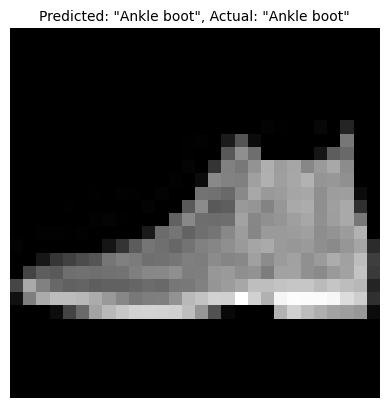

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Put the model in evaluation mode.
model.eval()

# Grab a test index
test_index = 0
x, y = test_data[test_index][0], test_data[test_index][1]

print("Remove extra dimesion from greyscale image:")
print("x.shape = ", x.shape)
img  = x.squeeze()
print("img.shape = ", img.shape)
print(" ")

with torch.no_grad():
    x = x.to(device)

    print("Create batch type shape for the model:")
    print("Batch of 1 x shape = ", x.unsqueeze(0).shape)
    pred = model(x.unsqueeze(0)) # Create a batch size = 1 using unsqueeze()
    print(" ")

    print("Outputs for all categories:")
    print(pred)
    print("Maximum index = ", pred[0].argmax(0))
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: "{predicted}", Actual: "{actual}"', fontsize=10)
    plt.axis('off')
    plt.show()